# Datathon 2024

### 1. Define the problem
Verilerde Girişimcilik Vakfı'nın 2014 yılından itibaren aldığı başvuruları ve Değerlendirme Puanı isimli kolonu gözlemleyebilirsiniz (train.csv). Bu dosyanın içerisinde aynı zamanda başvuran kişilerin anonim olarak paylaşılmış üniversite, aile detayları, ikamet detayları vb. bir çok bilgiyi gözlemleyebilirsiniz.
Bu bilgilerden yola çıkarak 11.049  kişinin değerlendirme puanını tahmin etmek (Regression Problemi)

### 2. Evaluation
Yarışmanın başarısını ölçmek için kullanılacak metrik ise RMSE olacaktır.


### 3. Data 
Veri içerisinde bulunan sütunlar:https : https://www.kaggle.com/competitions/datathon-2024/data


## EDA

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Datayi getir
train = pd.read_csv('datas/train.csv', low_memory=False)
test = pd.read_csv('datas/test_x.csv', low_memory=False)

In [3]:
# butun columnlara bakmamizi saglar
from IPython import display

pd.set_option('display.max_columns', None)

In [4]:
train.head(2)

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,Bilgisayar Muhendisligi,3,3.50-3,Hayır,Ankara Ataturk Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.50-3,Hayır,NaN,NaN,Üniversite,Hayır,0,Üniversite,Emekli,0,1,Evet,Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Ba...,Evet,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,Elektrik Elektronik Mühendisliği,3,3.00-2.50,Hayır,Betül Can Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.00 - 4.00,Hayır,NaN,NaN,Üniversite,Evet,Kamu,Yüksek Lisans / Doktora,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1


In [5]:
test.head(2)

,Basvuru Yili,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2023,Kadın,21.06.2002 00:00,Amasya,Amasya,Munzur Üniversitesi,Devlet,NaN,Hayır,Sosyal Hizmet,1,2.50 - 2.99,NaN,Amasya Suluova Şehit Muharrem Saygun Anadolu L...,NaN,Amasya,Devlet,Eşit Ağırlık,NaN,50 - 74,Hayır,-,-,İlkokul,Evet,Özel Sektör,Ortaokul,Evet,Diğer,2.0,Hayır,NaN,Evet,Takım Oyuncusu,Evet,Kızılay da gönüllü dağıtım,NaN,Hayır,-,Evet,NaN,NaN,0
1,2023,Kadın,11.05.2004 00:00,Konya,Konya,Hacettepe Üniversitesi,Devlet,NaN,Hayır,Uluslararası İlişkiler,1,Hazırlığım,NaN,Açık Öğretim Lisesi,NaN,Konya,Devlet,Eşit Ağırlık,NaN,75 - 100,Hayır,-,-,İlkokul,Hayır,-,İlkokul,Evet,Özel Sektör,3.0,Hayır,NaN,Evet,Bireysel Spor,Hayır,-,NaN,Hayır,-,Evet,NaN,NaN,1


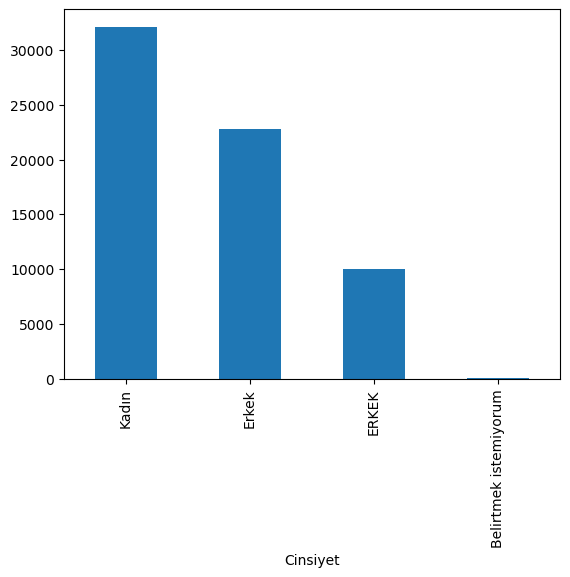

In [6]:
train['Cinsiyet'].value_counts().plot.bar();

In [7]:
# Let's check how much missing value we have
length = len(train)
null_counts = train.isna().sum()
df_null_counts = pd.DataFrame({'Column Name': null_counts.index, 'Null Count': null_counts.values})
df_null_counts = df_null_counts.reset_index(drop=True)
df_null_counts.sort_values(by=['Null Count'], ascending=False, inplace=True)
df_null_counts['Null Count'] = df_null_counts['Null Count']/length # For seeing percentage

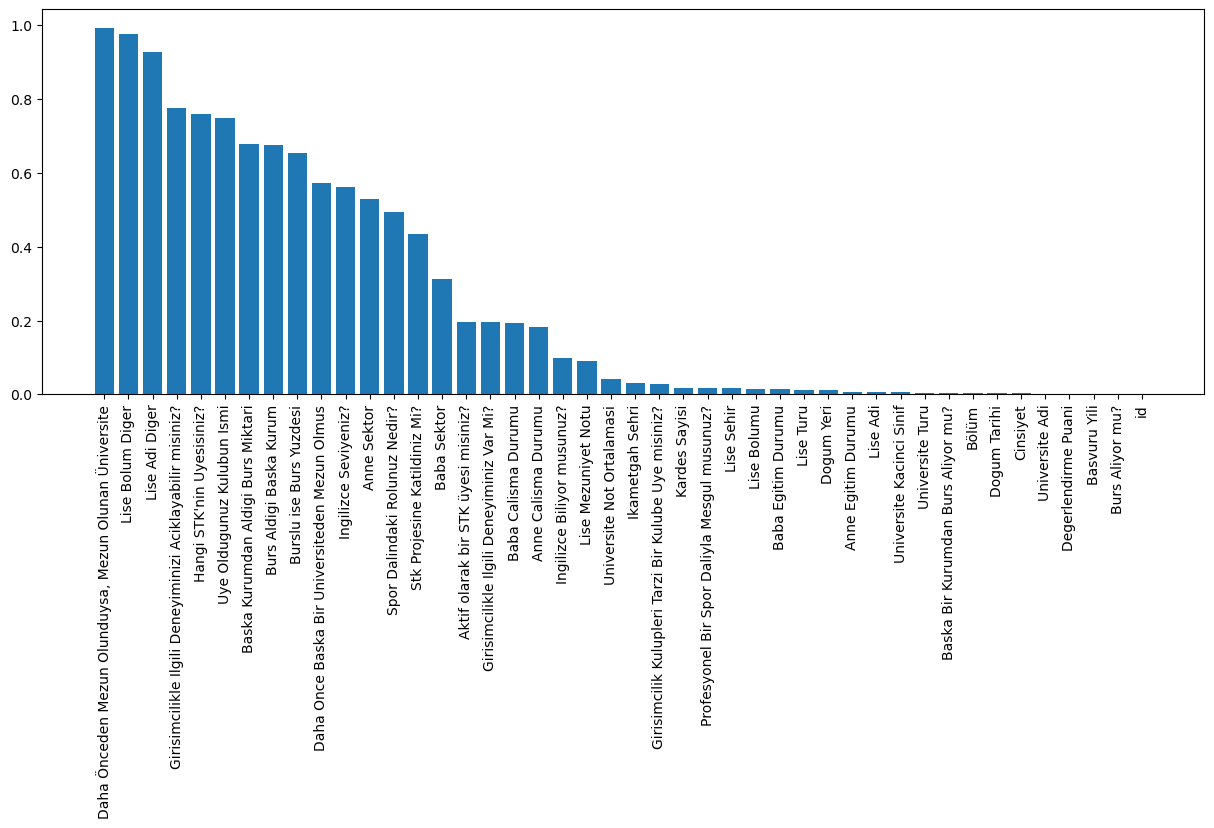

In [8]:
# Let's visulize
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(df_null_counts['Column Name'], df_null_counts['Null Count']);

In [9]:
# Bazı kolonlar test setinde olmadığı için bazıları ise boş olduğu için kaldıralım
dropped_columns=["Burslu ise Burs Yuzdesi","Daha Once Baska Bir Universiteden Mezun Olmus","Lise Adi Diger","Lise Bolum Diger","Uye Oldugunuz Kulubun Ismi",
                 "Stk Projesine Katildiniz Mi?","Ingilizce Seviyeniz?","Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite"]
train=train.drop(dropped_columns,axis=1)

In [10]:
train['Dogum Tarihi'].value_counts()

Dogum Tarihi
1/1/70 2:00         1655
1/1/00 0:00          179
1/1/01 0:00          154
1/1/1997             139
1/1/1998             129
                    ... 
1992-05-12             1
1997-03-19             1
1996-08-17             1
1991-04-23             1
12.11.2003 00:00       1
Name: count, Length: 13498, dtype: int64

In [11]:
train['Universite Turu'].value_counts()

Universite Turu
Devlet    37885
DEVLET    15377
Özel       8336
ÖZEL       3272
Name: count, dtype: int64

In [12]:
# Lets concatanite two df to visulize is Universite Turu impact to Degerlendirme puanina
devlet = pd.concat([train[train['Universite Turu'] == 'Devlet'], train[train['Universite Turu'] == 'DEVLET']])    
devlet['Universite Turu'] = 'Devlet'
ozel = pd.concat([train[train['Universite Turu'] == 'Özel'], train[train['Universite Turu'] == 'ÖZEL']])   
ozel['Universite Turu'] = 'Özel'
all = pd.concat([devlet, ozel])

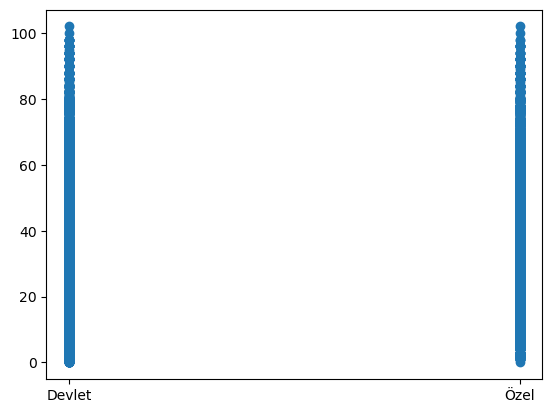

In [13]:
fig = plt.figure()
plt.scatter(x=all['Universite Turu'], y=all['Degerlendirme Puani']);

In [14]:
train[train['Universite Turu'] == 'ÖZEL']['Degerlendirme Puani'].mean(), train[train['Universite Turu'] == 'DEVLET']['Degerlendirme Puani'].mean()

(29.06448655256724, 24.367822071925602)

Boylelikle Universite Turunun buyuk bir etkisi oldugunu gorebiliyoruz

## LowerCase

In [15]:
# lowercase yapilacak columnlari bulalim.
low_yap_train = ['Cinsiyet', 'Dogum Yeri', 'Ikametgah Sehri', 'Universite Adi', 
           'Universite Turu', 'Burs Aliyor mu?', 'Bölüm', 'Lise Adi',
           'Lise Sehir', 'Lise Turu', 'Burs Aldigi Baska Kurum', 'Anne Egitim Durumu',
           'Anne Sektor', 'Baba Calisma Durumu', 'Baba Sektor',
            'Spor Dalindaki Rolunuz Nedir?']
drop_colm = ['Lise Bolumu', ]

In [16]:
# Lowecase yapan method
def make_lowercase(list_of_low, df):
    for label in list_of_low:
        df[label] = df[label].str.lower()

In [17]:
make_lowercase(low_yap_train, train)

## University Note translate

In [18]:
# Fill the empty note data
train['Universite Not Ortalamasi'] = train['Universite Not Ortalamasi'].fillna('missing')

In [19]:
# Universite Notunu duzgun formata uyarlayiniz.
Univertiy_map = {'Ortalama bulunmuyor': 'missing',
                 'ORTALAMA BULUNMUYOR': 'missing',
                 'Not ortalaması yok': 'missing',
                 'Hazırlığım': 'Hazırlığım',
                 '3.50-3': '3.00 - 3.49',
                 '3.00-2.50': '2.50 - 2.99',
                 '2.50 ve altı': '1.80 - 2.49',
                 '3.00 - 4.00': '3.00 - 3.49',
                 '3.50 - 4.00': '3.50 - 4.00',
                 '3.00 - 3.50': '3.00 - 3.49',
                 '2.50 -3.00': '2.50 - 2.99',
                 '4-3.5': '3.50 - 4.00',
                 '2.50 - 3.00': '2.50 - 2.99',
                 '2.00 - 2.50': '1.80 - 2.49',
                 '1.00 - 2.50': '1.80 - 2.49',
                 '4.0-3.5': '3.50 - 4.00',
                 '3.00 - 3.49': '3.00 - 3.49',
                 '2.50 - 2.99': '2.50 - 2.99',
                 '1.80 - 2.49': '1.80 - 2.49',
                 '0 - 1.79': '0 - 1.79',
                 'missing': 'missing'
                }
train['Universite Not Ortalamasi'] = train['Universite Not Ortalamasi'].map(Univertiy_map)

In [20]:
# Visulize test unique values
pd.unique(test['Universite Not Ortalamasi'])

array(['2.50 - 2.99', 'Hazırlığım', '3.00 - 3.49', '1.80 - 2.49',
       '3.50 - 4.00', '0 - 1.79'], dtype=object)

In [21]:
# Visulize train unique values
pd.unique(train['Universite Not Ortalamasi'])

array(['3.00 - 3.49', '2.50 - 2.99', 'missing', '1.80 - 2.49',
       '3.50 - 4.00', 'Hazırlığım', '0 - 1.79'], dtype=object)

In [22]:
train['Universite Not Ortalamasi'].isna().sum()

0

## Spor dalindaki rolunuz nedir kolonunu duzenleme

In [23]:
spor_mapping = {
    'diğer': 'Diğer',
    '0': '-',
    '-': '-',
    'kaptan': 'Lider/Kaptan',
    'kaptan / li̇der': 'Lider/Kaptan',
    'di̇ğer': 'Diğer', 
    'lider/kaptan': 'Lider/Kaptan', 
    'bireysel': 'Bireysel Spor',
    'takım oyuncusu': 'Takım Oyuncusu'
}

In [24]:
train["Spor Dalindaki Rolunuz Nedir?"] = train["Spor Dalindaki Rolunuz Nedir?"].fillna('-')

In [25]:
# Visulize test unique values
pd.unique(test["Spor Dalindaki Rolunuz Nedir?"])

array(['Takım Oyuncusu', 'Bireysel Spor', '-', 'Lider/Kaptan', 'Diğer'],
      dtype=object)

In [26]:
# Visulize train unique values
pd.unique(train["Spor Dalindaki Rolunuz Nedir?"])

array(['diğer', '0', '-', 'kaptan', 'kaptan / li̇der', 'di̇ğer',
       'lider/kaptan', 'bireysel', 'takım oyuncusu'], dtype=object)

In [27]:
test["Spor Dalindaki Rolunuz Nedir?"].isna().sum()

0

In [28]:
train["Spor Dalindaki Rolunuz Nedir?"].isna().sum()

0

In [29]:
train['Spor Dalindaki Rolunuz Nedir?'] = train['Spor Dalindaki Rolunuz Nedir?'].map(spor_mapping)

## Burs aldigi baska kurum duzenleme

Burslari 3 parcaya ayirdim
1. Kyk Bursu alan - kyk
2. Diger yerlerden burs alan - diger
3. Burs almayan - yok

In [32]:
array = test['Burs Aldigi Baska Kurum'].value_counts()
array = array[:30]
array

Burs Aldigi Baska Kurum
-                                   6524
KYK                                  832
Kyk                                  767
kyk                                  187
Devlet                               144
Kredi ve Yurtlar Kurumu              139
Kredi Yurtlar Kurumu                 125
Kyk bursu                            112
KYK bursu                            100
Devlet bursu                          52
Kredi yurtlar kurumu                  49
Kredi ve yurtlar kurumu               46
KYK Bursu                             35
Gençlik ve Spor Bakanlığı             33
Kredi ve Yurtlar Genel Müdürlüğü      24
KYK burs                              23
KYK BURSU                             20
Mehmet Zorlu Vakfı                    20
Türk Eğitim Vakfı                     18
TEV                                   18
Kyk devlet bursu                      17
GSB                                   17
Kyk bursu alıyorum                    17
KYK bursu alıyorum.              

In [33]:
burs_tops = []
array = train['Burs Aldigi Baska Kurum'].value_counts()
array = array[:30]
array

Burs Aldigi Baska Kurum
kyk                                       6666
-                                         4711
kredi ve yurtlar kurumu                    895
kredi yurtlar kurumu                       757
kyk bursu                                  526
devlet                                     374
devlet bursu                               145
çağdaş yaşamı destekleme derneği           120
tev                                        108
k                                          103
kyk devlet bursu                           101
ky                                          88
kyk kredi                                   81
gençlik ve spor bakanlığı                   80
kyk bursu alıyorum                          77
türk eğitim vakfı                           75
kredi̇ ve yurtlar kurumu                    64
kredi ve yurtlar genel müdürlüğü            63
kyk burs                                    62
başbakanlık bursu                           59
kredi̇ yurtlar kurumu               

In [30]:
kyk = 'kyk'
burs_mapping_test ={
'-': '-',
"KYK": kyk,                              
"Kyk": kyk,                                  
"kyk": kyk,                                  
"Devlet": kyk,                               
"Kredi ve Yurtlar Kurumu": kyk,              
"Kredi Yurtlar Kurumu": kyk,                 
"Kyk bursu": kyk,                            
"KYK bursu": kyk,                            
"Devlet bursu": kyk,                         
"Kredi yurtlar kurumu": kyk,                 
"Kredi ve yurtlar kurumu": kyk,              
"KYK Bursu": kyk,                            
"Gençlik ve Spor Bakanlığı": kyk,            
"Kredi ve Yurtlar Genel Müdürlüğü": kyk,     
"KYK burs": kyk,                             
"KYK BURSU": kyk,                            
"Kyk devlet bursu": kyk,                     
"GSB": kyk,                                  
"Kyk bursu alıyorum": kyk,                   
"KYK bursu alıyorum.": kyk,                 
"Kyk Bursu": kyk,                            
"kyk bursu": kyk,                            
"devlet": kyk,                             
"KYK bursu alıyorum": kyk,                  
"KREDİ YURTLAR KURUMU": kyk,         
}

In [31]:
kyk = 'kyk'
burs_mapping_train = {
'kyk': kyk,                                  
'-': '-',                                        
'kredi ve yurtlar kurumu': kyk,                   
'kredi yurtlar kurumu': kyk,                      
'kyk bursu': kyk,                                 
'devlet': kyk,                                    
'devlet bursu': kyk,                              
'k': kyk,                                         
'kyk devlet bursu': kyk,                          
'ky': kyk,                                        
'kyk kredi': kyk,                                 
'gençlik ve spor bakanlığı': kyk,                 
'kyk bursu alıyorum': kyk,                        
'kredi̇ ve yurtlar kurumu': kyk,                  
'kredi ve yurtlar genel müdürlüğü': kyk,          
'kyk burs': kyk,                                  
'kredi̇ yurtlar kurumu': kyk,                     
'yüksek öğrenim kredi ve yurtlar kurumu': kyk,    
}

In [34]:
train['Burs Aldigi Baska Kurum'].isna().sum()

43977

In [35]:
train['Burs Aldigi Baska Kurum'] = train['Burs Aldigi Baska Kurum'].fillna('-')

In [36]:
test['Burs Aldigi Baska Kurum'].isna().sum()

0

In [37]:
train['Burs Aldigi Baska Kurum'] = train['Burs Aldigi Baska Kurum'].map(burs_mapping_train)

In [38]:
# simdi de farkli kurumlardan burs alan ogrencileri null olarak atadigindan onlara deger verelim
train['Burs Aldigi Baska Kurum'] = train['Burs Aldigi Baska Kurum'].fillna('diger')

In [39]:
test['Burs Aldigi Baska Kurum'] = test['Burs Aldigi Baska Kurum'].map(burs_mapping_test)

In [40]:
# simdi de farkli kurumlardan burs alan ogrencileri null olarak atadigindan onlara deger verelim
test['Burs Aldigi Baska Kurum'] = test['Burs Aldigi Baska Kurum'].fillna('diger')

Kontrol edelim istedigimiz donusumu yapabildik mi

In [41]:
array = test['Burs Aldigi Baska Kurum'].value_counts()
array = array[:30]
array

Burs Aldigi Baska Kurum
-        6524
kyk      2827
diger    1698
Name: count, dtype: int64

In [42]:
burs_tops = []
array = train['Burs Aldigi Baska Kurum'].value_counts()
array = array[:30]
array

Burs Aldigi Baska Kurum
-        48688
kyk      10185
diger     6252
Name: count, dtype: int64

## Visulazing data

In [43]:
box_plot_columns=["Universite Not Ortalamasi","Burs Aliyor mu?","Lise Mezuniyet Notu","Anne Calisma Durumu",
                  "Baba Calisma Durumu","Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"
                 ,"Profesyonel Bir Spor Daliyla Mesgul musunuz?","Spor Dalindaki Rolunuz Nedir?","Aktif olarak bir STK üyesi misiniz?",
                  "Girisimcilikle Ilgili Deneyiminiz Var Mi?", "Ingilizce Biliyor musunuz?"]

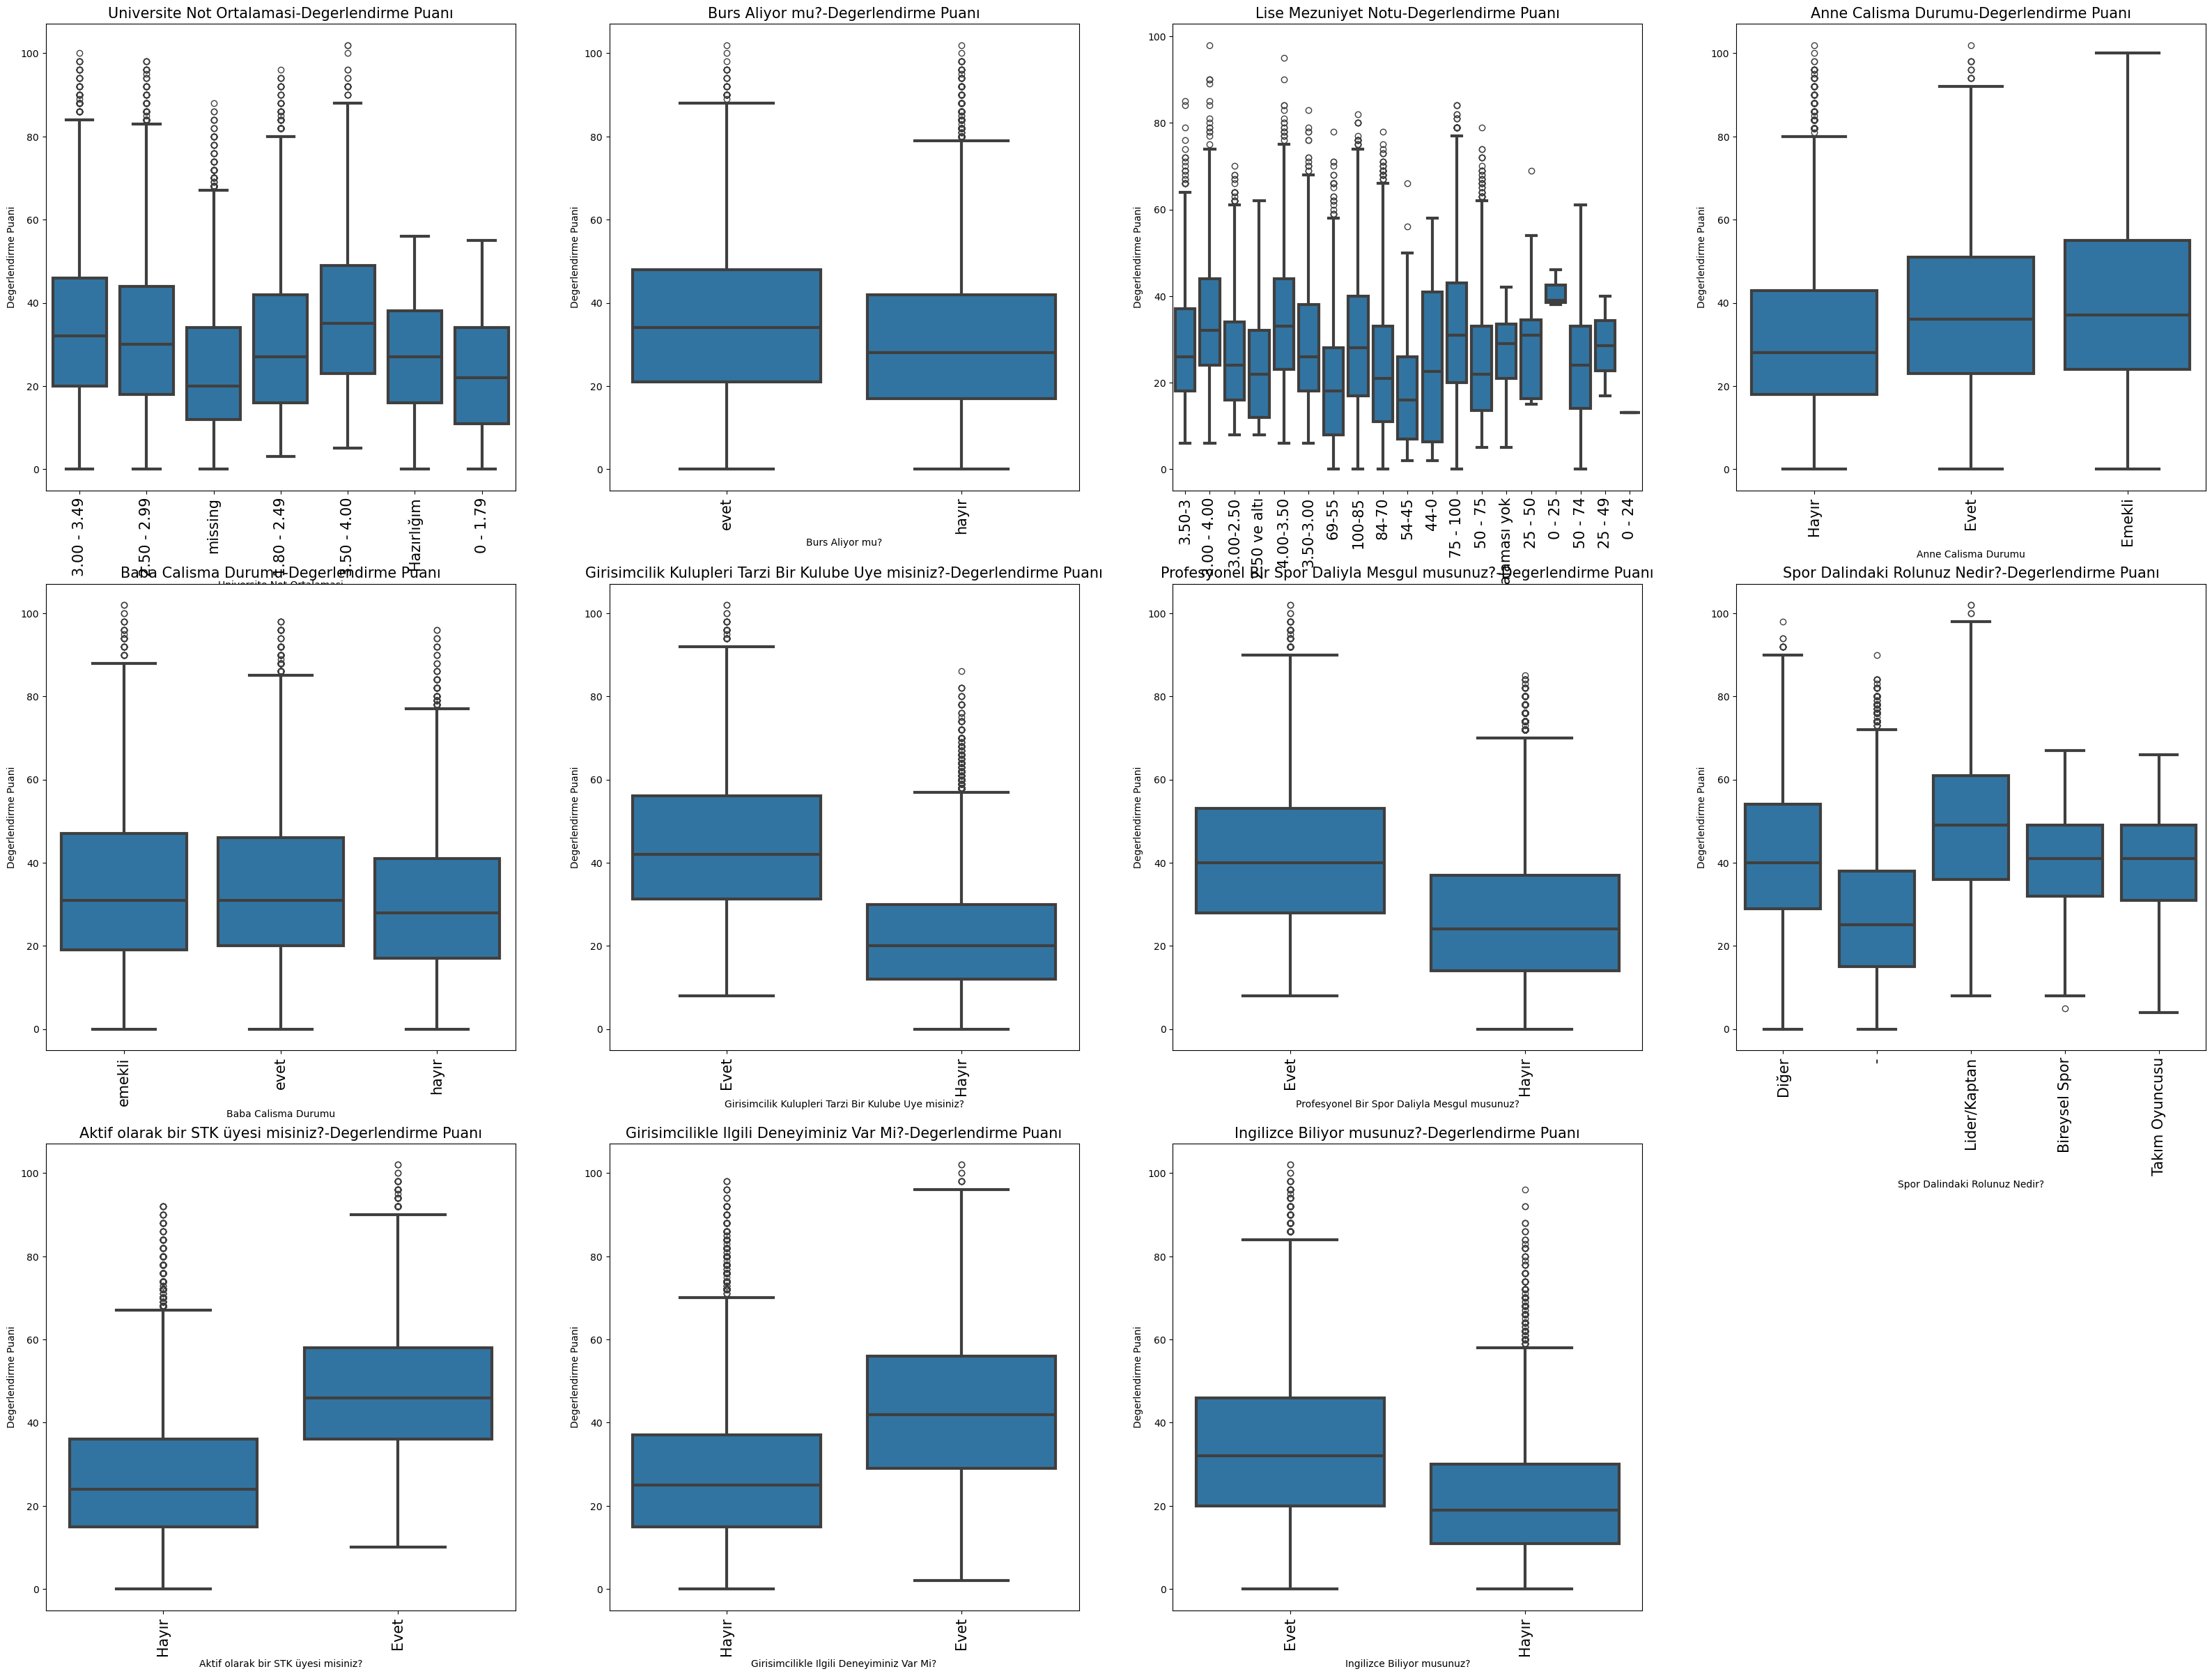

In [44]:
plt.figure(figsize=(40,40))
k=0
for i in box_plot_columns:
    ax=plt.subplot(4,4,k+1)
    k+=1
    ax=sns.boxplot(data=train,x=i,y="Degerlendirme Puani",linewidth=3)
    plt.title(f"{i}-Degerlendirme Puanı",fontsize=15)
    plt.xticks(rotation=90,fontsize=15);